<font face="Times New Roman" size=5>
<div dir=rtl align="center">
<font face="Times New Roman" size=5>
</font>
<br>
<img src="https://static.tildacdn.one/tild3639-3035-4131-a461-363737393037/noroot.png" alt="University Logo" width="400" height="224">
<br>
<font face="Times New Roman" size=5 align=center>
Sharif University of Technology
<br>
Electrical Engineering Department
</font>
<br>
<font size=6>
Assignment 3: Data Visualization + Web-scraping
</font>
<br>
<font size=4>
Zahra Helalizadeh 400102193
<br>
</font>
<font size=4>
Spring 2025
<br>
</font>
<font face="Times New Roman" size=4>
</font>
</div></font>

# 1. Introduction

This assignment focuses on two essential skills in the field of data science: **data visualization** and **web scraping**. We begin by working with the **Fashion MNIST** dataset, a popular dataset of 28×28 grayscale images of various fashion items such as shirts, shoes, and bags. Using this dataset, we demonstrate a wide range of data visualization techniques, including pie charts, box plots, bar charts, scatter plots, and interactive visualizations.

Data visualization is a powerful tool that allows us to understand trends, distributions, and relationships within datasets. Through various chart types, we will extract insights from the Fashion MNIST dataset, ensuring each plot includes meaningful titles, labels, legends, and axes.

In the second part of the assignment, we will use **web scraping** to collect real-world data from [Bama.ir](https://bama.ir), a car listing website. Specifically, we aim to extract information about 50 **Samand** cars manufactured after 1385 (2006-2007). We will collect attributes such as:
- Price  
- Mileage  
- Color  
- Production year  
- Transmission type (manual or automatic)  
- Description

The scraped data will then be organized into a structured format and exported as an Excel file.

This assignment strengthens our understanding of both **visual storytelling with data** and **data extraction from web sources**, two key competencies for any aspiring data scientist.


# 2. Data Visualization on Fashion MNIST  
## 2.1 Dataset Overview

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import fashion_mnist

# Load the Fashion MNIST dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Print dataset shapes
print(f"Training data shape: {X_train.shape}, Labels: {y_train.shape}")
print(f"Test data shape: {X_test.shape}, Labels: {y_test.shape}")

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28), Labels: (60000,)
Test data shape: (10000, 28, 28), Labels: (10000,)


### Description

The **Fashion MNIST** dataset consists of 70,000 grayscale images of clothing items, split into:
- 60,000 training samples
- 10,000 test samples

Each image is **28×28 pixels** and belongs to one of 10 fashion categories.

### Class Labels

The dataset includes the following classes:

In [ ]:
# Class label mapping
label_names = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

### Sample Images

Let's visualize a few sample images from the training set with their corresponding labels.

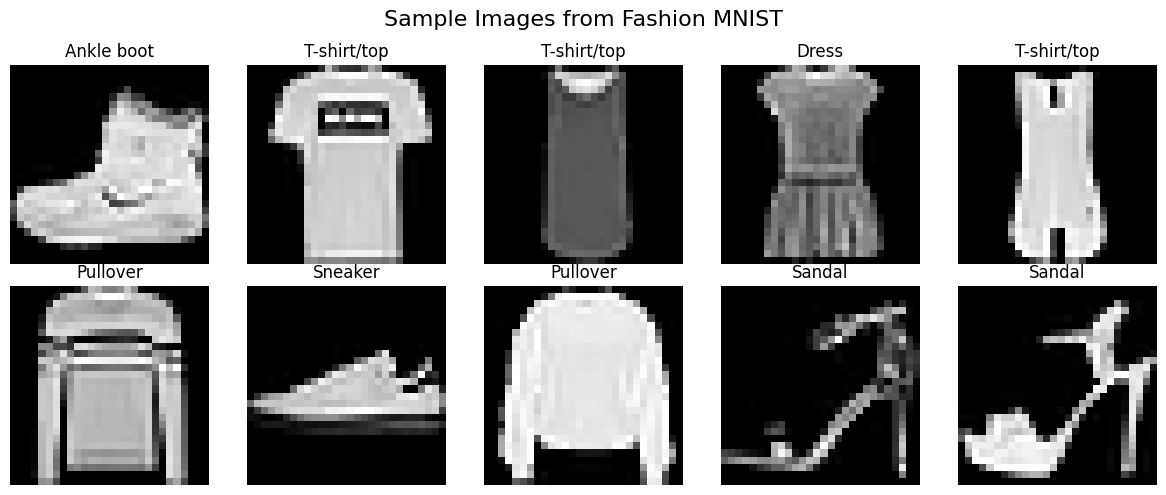

In [ ]:
# Plot 10 sample images with labels
plt.figure(figsize=(12, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(label_names[y_train[i]])
    plt.axis('off')
plt.suptitle("Sample Images from Fashion MNIST", fontsize=16)
plt.tight_layout()
plt.show()

## 2.2 Pie Charts

Pie charts are useful for visualizing the **proportion of different categories** within a dataset.  
Here, we will create a pie chart to show the distribution of fashion item classes in the **training set** of the Fashion MNIST dataset.


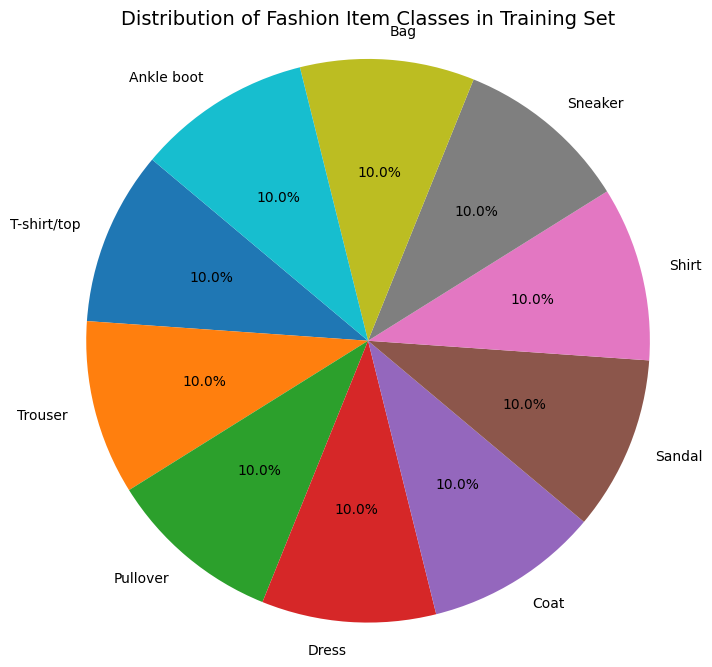

In [ ]:
# Count the number of samples in each class
class_counts = pd.Series(y_train).value_counts().sort_index()
class_names = [label_names[i] for i in class_counts.index]

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_names, autopct='%1.1f%%', startangle=140)
plt.title("Distribution of Fashion Item Classes in Training Set", fontsize=14)
plt.axis('equal')  # Equal aspect ratio ensures pie is drawn as a circle.
plt.show()

### Interpretation

Each class in the Fashion MNIST dataset is **evenly distributed**, with each class making up about **10% of the training data**.  
This balanced distribution makes the dataset well-suited for classification tasks.

## 2.3 Box Plots

Box plots are useful for understanding the **distribution of pixel intensities** in images, identifying **outliers**, and comparing **spread and skewness** across categories.

In this section, we will:
- Flatten each image into a vector of 784 pixels (28×28).
- Compute the average pixel intensity per image.
- Compare the distribution of average pixel intensities across a few fashion item classes.


In [ ]:
# Create a DataFrame with average pixel values and labels
avg_pixel_values = X_train.reshape(X_train.shape[0], -1).mean(axis=1)
df_box = pd.DataFrame({
    'Label': y_train,
    'Average Pixel Intensity': avg_pixel_values
})

# Map numerical labels to class names
df_box['Label'] = df_box['Label'].map(label_names)

# Select a few classes to make the boxplot more readable
selected_classes = ['T-shirt/top', 'Trouser', 'Sandal', 'Sneaker', 'Bag']
df_selected = df_box[df_box['Label'].isin(selected_classes)]

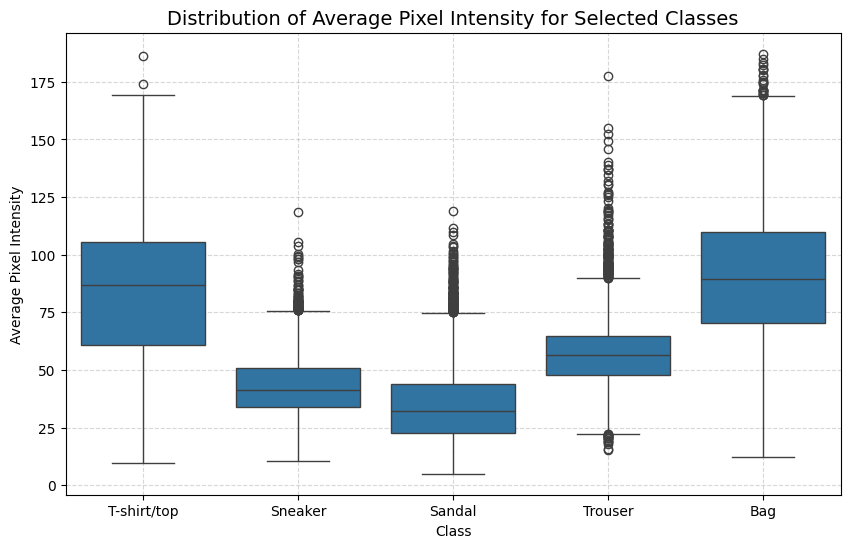

In [ ]:
# Plot box plots
plt.figure(figsize=(10, 6))
sns.boxplot(x='Label', y='Average Pixel Intensity', data=df_selected)
plt.title('Distribution of Average Pixel Intensity for Selected Classes', fontsize=14)
plt.xlabel('Class')
plt.ylabel('Average Pixel Intensity')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

### Interpretation

The box plots show how the average brightness of images varies across different fashion items. For instance:
- **Trousers** and **sandals** tend to have lower average pixel intensities (darker images).
- **Bags** and **sneakers** have relatively higher pixel intensities (brighter images).
- Outliers in each class represent unusually bright or dark samples.

This analysis can help identify preprocessing needs (like normalization or thresholding) in further modeling tasks.


## 2.4 Line Charts

Line charts are great for visualizing **trends** and **sequential data**. While the Fashion MNIST dataset doesn’t include time series data, we can still use line charts creatively to analyze the data.

In this section, we'll visualize the **average pixel intensity profile** across the image width (columns) for different classes.  
This helps us understand the **horizontal structure and intensity variation** in images for various fashion items.

In [ ]:
# Compute average pixel intensity per column (axis=0) for selected classes
def get_average_profile(class_label):
    class_images = X_train[y_train == class_label]
    return class_images.mean(axis=0).mean(axis=0)  # average over rows and samples

# Select some classes for comparison
selected_labels = [0, 1, 3, 5]  # T-shirt/top, Trouser, Dress, Sandal
profiles = {label_names[label]: get_average_profile(label) for label in selected_labels}

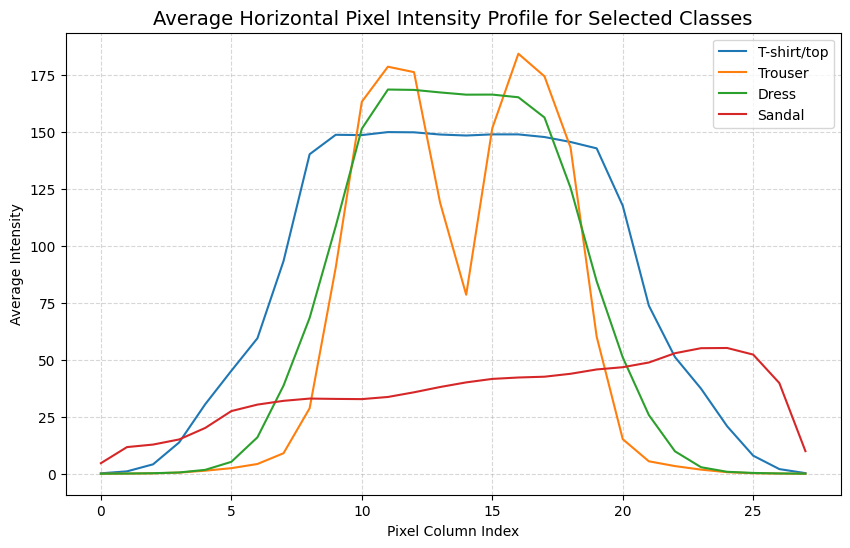

In [ ]:
# Plot line chart for average pixel intensity profiles
plt.figure(figsize=(10, 6))
for class_name, profile in profiles.items():
    plt.plot(profile, label=class_name)

plt.title('Average Horizontal Pixel Intensity Profile for Selected Classes', fontsize=14)
plt.xlabel('Pixel Column Index')
plt.ylabel('Average Intensity')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

### Interpretation

The line chart shows how pixel intensities change across the horizontal axis of the image for each class.  
- **Trousers** have more intensity toward the center, consistent with their vertical shape.
- **Sandals** and **T-shirts** show different profiles due to their distinct shapes and textures.

This visualization helps in identifying **spatial patterns** across image data.


## 2.5 Multiple / Stacked Line Charts

In this section, we will create **multiple line charts** in a single plot to compare the **vertical pixel intensity profiles** of several fashion item classes. This reveals how pixel values vary from top to bottom in different clothing types.

To make the comparison clearer, we'll **stack** the lines using an area-style plot (stacked line chart).


In [ ]:
# Compute average vertical profile (mean across columns for each row)
def get_vertical_profile(label):
    images = X_train[y_train == label]
    return images.mean(axis=0).mean(axis=1)  # average over columns and samples

# Select classes
selected_labels = [0, 1, 2, 3]  # T-shirt/top, Trouser, Pullover, Dress
vertical_profiles = {label_names[label]: get_vertical_profile(label) for label in selected_labels}

# Create DataFrame for stacked area chart
df_vertical = pd.DataFrame(vertical_profiles)
df_vertical.index.name = "Pixel Row Index"

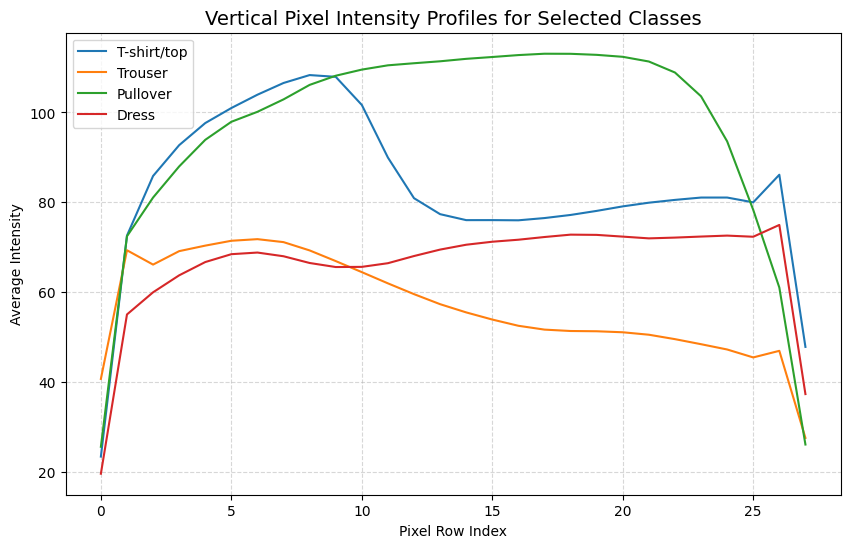

In [ ]:
# Plot multiple line chart
plt.figure(figsize=(10, 6))
for column in df_vertical.columns:
    plt.plot(df_vertical.index, df_vertical[column], label=column)

plt.title('Vertical Pixel Intensity Profiles for Selected Classes', fontsize=14)
plt.xlabel('Pixel Row Index')
plt.ylabel('Average Intensity')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

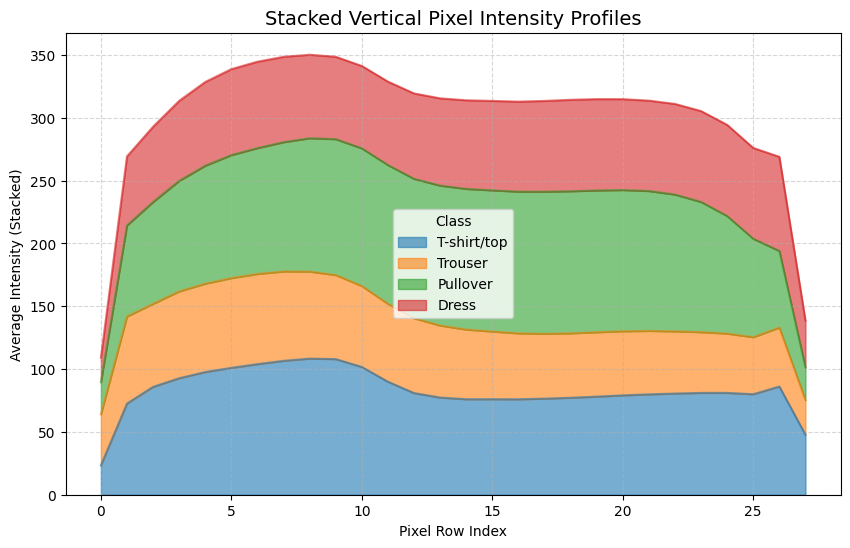

In [ ]:
# Plot stacked line chart (area plot)
df_vertical.plot.area(figsize=(10, 6), alpha=0.6)
plt.title('Stacked Vertical Pixel Intensity Profiles', fontsize=14)
plt.xlabel('Pixel Row Index')
plt.ylabel('Average Intensity (Stacked)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title="Class")
plt.show()

### Interpretation

- The **multiple line chart** helps compare vertical structures of different clothing items.
- The **stacked area chart** highlights how each class contributes to the overall pixel intensity along the image height.

These visualizations can provide clues for designing feature extractors in image classification tasks.

## 2.6 Bar Charts

Bar charts are effective for comparing **categorical data**. Here, we will use bar charts to visualize the **number of samples per class** in the Fashion MNIST training set, reinforcing the class distribution seen in the pie chart.

We will create:
- A simple bar chart showing counts per class.


<ipython-input-12-4431da637e4b>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_names, y=class_counts, palette='viridis')


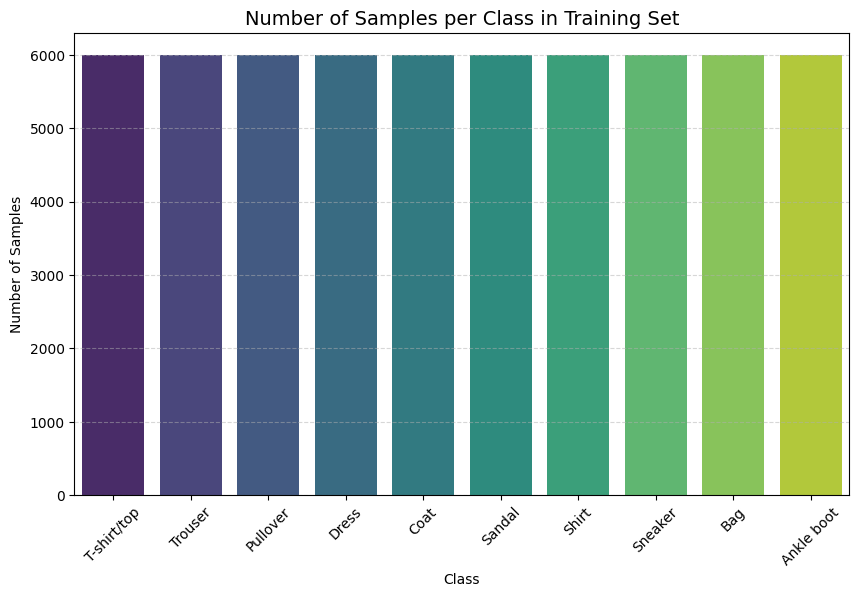

In [ ]:
# Count samples per class
class_counts = pd.Series(y_train).value_counts().sort_index()
class_names = [label_names[i] for i in class_counts.index]

# Plot simple bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=class_names, y=class_counts, palette='viridis')
plt.title('Number of Samples per Class in Training Set', fontsize=14)
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

### Interpretation

This bar chart confirms that the Fashion MNIST dataset is **balanced**, with roughly equal numbers of samples for each class.  
Balanced datasets are important for training unbiased machine learning models.

## 2.7 Multiple and Stacked Bar Charts

Multiple and stacked bar charts are useful for comparing **more than one variable** across categories.

Here, we will create:
- A **multiple bar chart** comparing the number of samples in both the training and test sets per class.
- A **stacked bar chart** showing the combined distribution of samples from both sets.

This will help us understand the data split between training and test datasets for each class.

In [ ]:
# Count samples per class in training and test sets
train_counts = pd.Series(y_train).value_counts().sort_index()
test_counts = pd.Series(y_test).value_counts().sort_index()

# Create a DataFrame combining train and test counts
df_counts = pd.DataFrame({
    'Train': train_counts,
    'Test': test_counts
})
df_counts.index = [label_names[i] for i in df_counts.index]

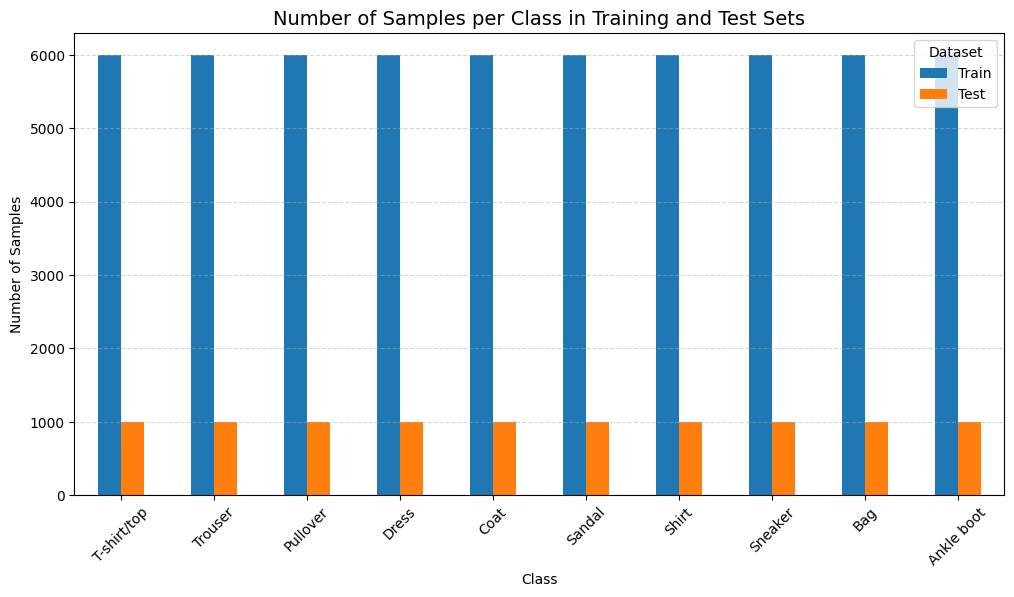

In [ ]:
# Plot multiple bar chart
df_counts.plot(kind='bar', figsize=(12, 6))
plt.title('Number of Samples per Class in Training and Test Sets', fontsize=14)
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(title='Dataset')
plt.show()

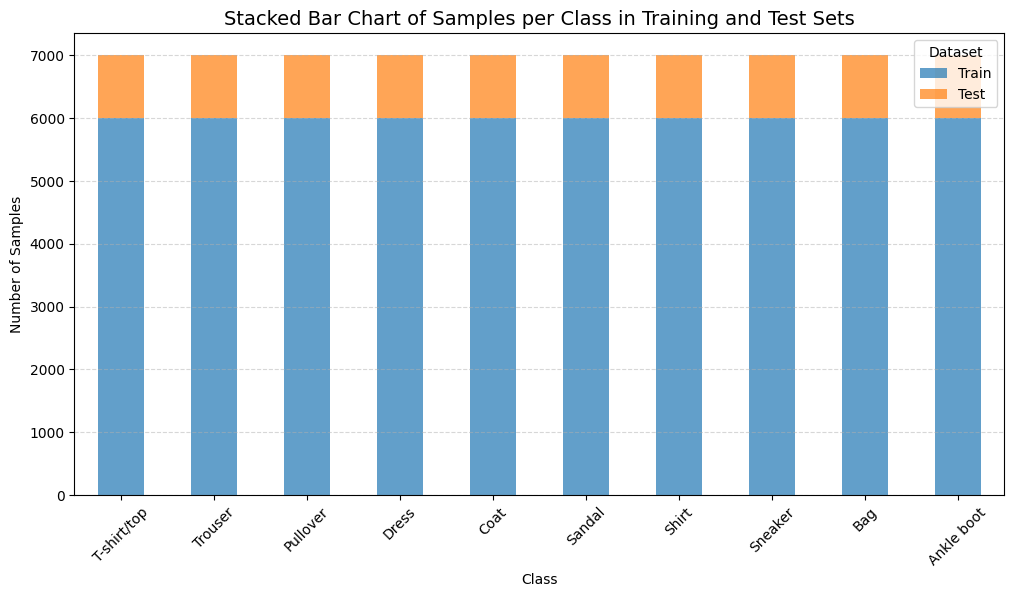

In [ ]:
# Plot stacked bar chart
df_counts.plot(kind='bar', stacked=True, figsize=(12, 6), alpha=0.7)
plt.title('Stacked Bar Chart of Samples per Class in Training and Test Sets', fontsize=14)
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(title='Dataset')
plt.show()

### Interpretation

- The **multiple bar chart** shows a clear comparison of sample counts between training and test datasets for each class.
- The **stacked bar chart** visualizes the total number of samples per class, divided by dataset split.

This confirms that the dataset is well balanced and evenly split between training and testing sets, supporting robust model evaluation.

## 2.8 Scatter Plots

Scatter plots are used to visualize the relationship between two variables and detect patterns, clusters, or outliers.

Since Fashion MNIST images are high-dimensional (28×28 pixels), we first reduce the dimensionality using **Principal Component Analysis (PCA)** to 2 dimensions.  
We then plot the images’ PCA embeddings colored by their class labels to explore how well the classes separate in this reduced space.


In [ ]:
from sklearn.decomposition import PCA

# Flatten images to vectors
X_train_flat = X_train.reshape(X_train.shape[0], -1)

# Apply PCA to reduce to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_flat)

# Create a DataFrame for plotting
df_pca = pd.DataFrame({
    'PC1': X_pca[:, 0],
    'PC2': X_pca[:, 1],
    'Label': [label_names[i] for i in y_train]
})

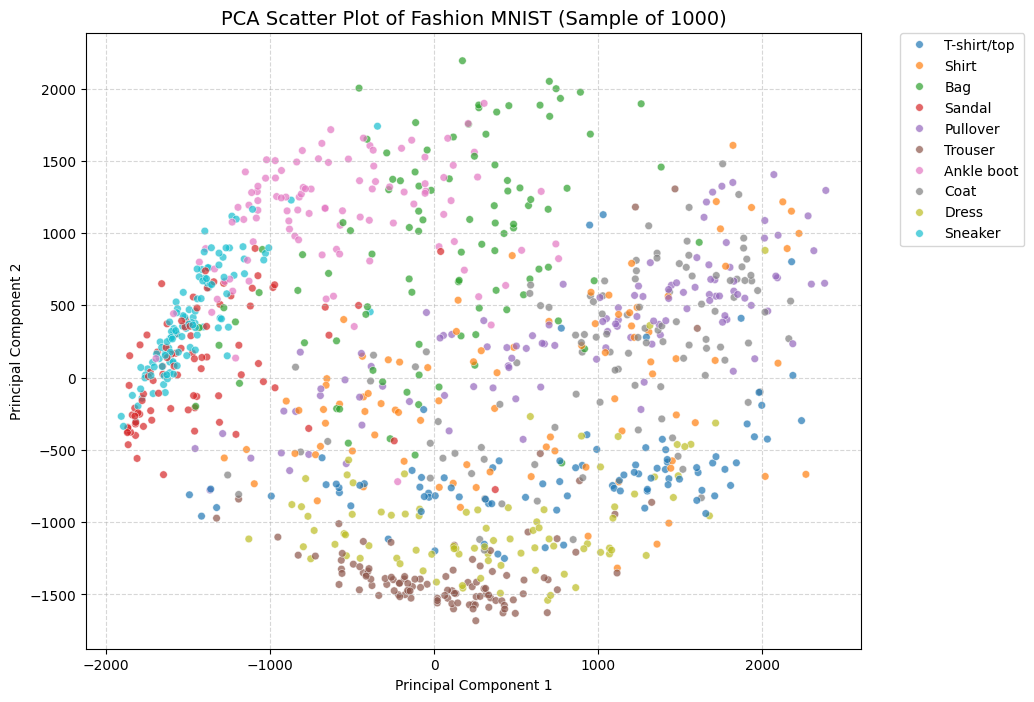

In [ ]:
# Plot scatter plot of PCA components
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_pca.sample(1000), x='PC1', y='PC2', hue='Label', palette='tab10', alpha=0.7, s=30)
plt.title('PCA Scatter Plot of Fashion MNIST (Sample of 1000)', fontsize=14)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='best', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

### Interpretation

- The scatter plot reveals how different classes cluster in the PCA-reduced space.
- Some classes like **Trousers** and **Sneakers** form more distinct clusters, while others such as **Shirts** and **Pullovers** overlap more.
- This visualization gives insight into class separability and the complexity of the classification task.

## 2.9 Bubble Charts

Bubble charts extend scatter plots by adding a third dimension through the size of the bubbles.  
In this section, we will visualize the PCA-reduced data from the previous section, with bubble sizes representing the **average pixel intensity** of each image.  

This adds additional information about the brightness of the items along with their position in the 2D PCA space.

In [ ]:
# Calculate average pixel intensity per image
avg_intensity = X_train_flat.mean(axis=1)

# Create DataFrame including PCA components, labels, and average intensity
df_bubble = pd.DataFrame({
    'PC1': X_pca[:, 0],
    'PC2': X_pca[:, 1],
    'Label': [label_names[i] for i in y_train],
    'AvgIntensity': avg_intensity
})

# Sample data to plot for faster rendering
df_bubble_sample = df_bubble.sample(1000, random_state=42)

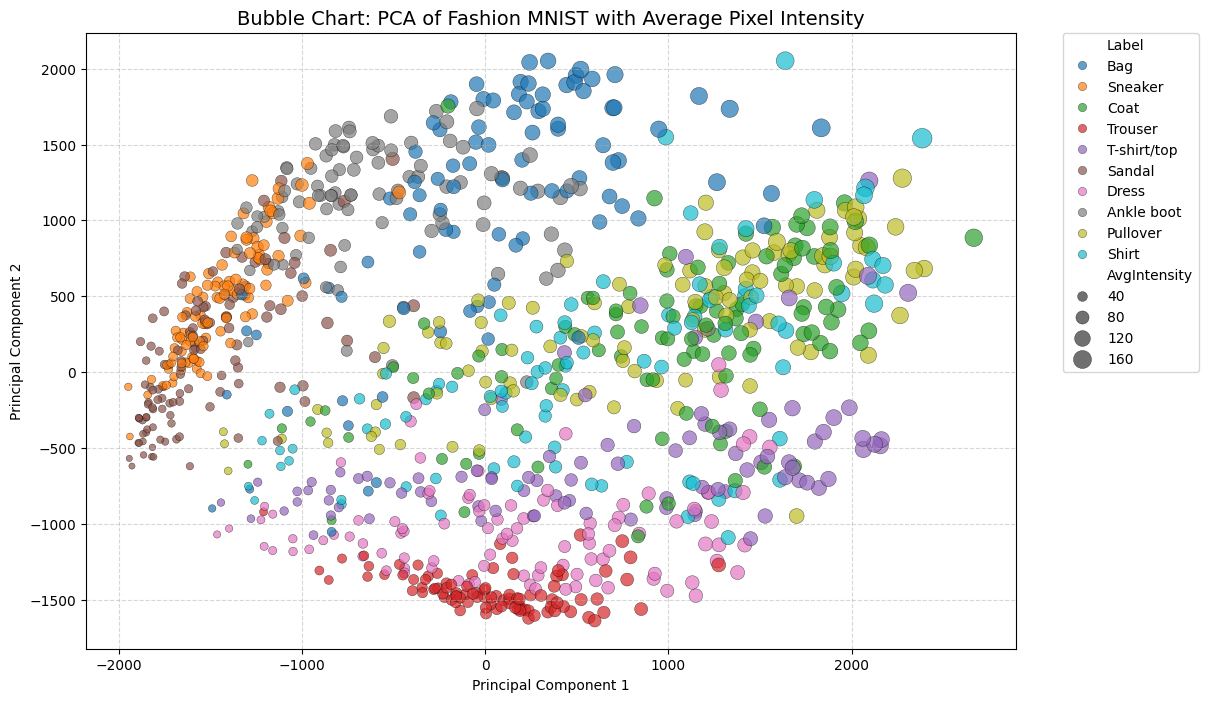

In [ ]:
# Plot bubble chart using seaborn scatterplot with size
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df_bubble_sample,
    x='PC1',
    y='PC2',
    hue='Label',
    size='AvgIntensity',
    sizes=(20, 200),
    palette='tab10',
    alpha=0.7,
    edgecolor='k',
    linewidth=0.3
)

plt.title('Bubble Chart: PCA of Fashion MNIST with Average Pixel Intensity', fontsize=14)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='best', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

### Interpretation

- Bubble sizes indicate the brightness of each image.
- Larger bubbles correspond to brighter images, which may relate to the type of clothing or texture.
- This visualization adds depth by combining spatial distribution with intensity information, helping us better understand the dataset's structure.

## 2.10 Visualizing Uncertainty with Error Bars

Error bars are useful to represent the **uncertainty** or **variability** in our data.  
They indicate how much variation or spread exists around the mean values.  

In this section, we will visualize the **average pixel intensity** of images in each class of the Fashion MNIST dataset along with their **standard deviation** as error bars.  
This will help us understand the brightness consistency within each clothing category.


In [ ]:
# Calculate average pixel intensity for each image
avg_intensity = X_train_flat.mean(axis=1)

# Create a DataFrame with numeric labels and average intensity
df_bubble = pd.DataFrame({
    'LabelNum': y_train,
    'AvgIntensity': avg_intensity
})

# Group by numeric label and compute mean and std of average intensity
avg_intensity_per_class = df_bubble.groupby('LabelNum')['AvgIntensity'].agg(['mean', 'std'])

# Map numeric labels to class names for better readability in the plot
avg_intensity_per_class.index = avg_intensity_per_class.index.map(lambda x: label_names[x])

# Display the aggregated data to confirm correctness
display(avg_intensity_per_class)


,mean,std
LabelNum,,
T-shirt/top,83.029980,28.913013
Trouser,56.840855,14.523718
Pullover,96.058763,32.650808
Dress,66.018909,21.396709
Coat,98.258006,26.429053
Sandal,34.867547,15.836440
Shirt,84.605120,33.084442
Sneaker,42.762072,12.837450
Bag,90.157153,28.769504


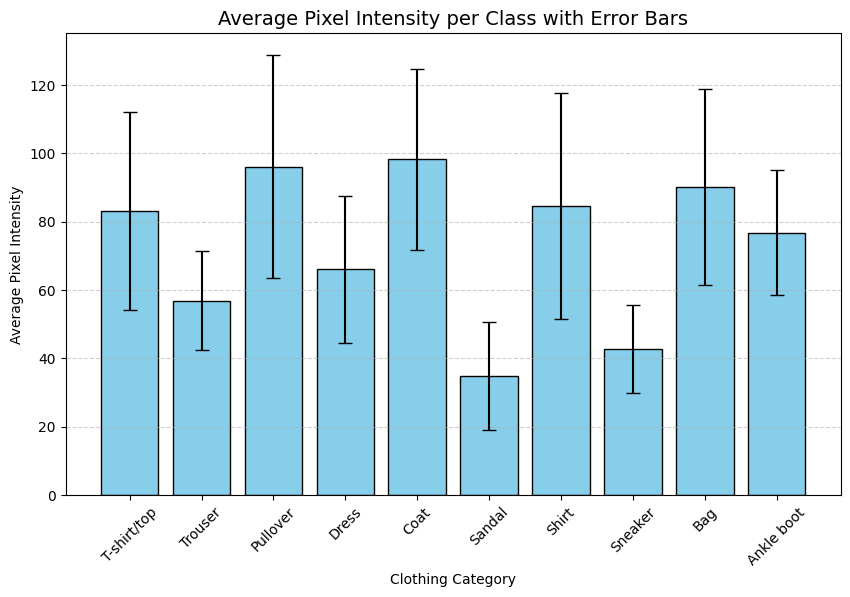

In [ ]:
# Plotting the bar chart with error bars
plt.figure(figsize=(10, 6))
plt.bar(
    avg_intensity_per_class.index,
    avg_intensity_per_class['mean'],
    yerr=avg_intensity_per_class['std'],
    capsize=5,
    color='skyblue',
    edgecolor='black'
)
plt.title('Average Pixel Intensity per Class with Error Bars', fontsize=14)
plt.xlabel('Clothing Category')
plt.ylabel('Average Pixel Intensity')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

### Interpretation

- The height of each bar represents the **mean brightness** (average pixel intensity) of images in each clothing category.
- The error bars represent the **standard deviation**, showing the variability of brightness within that category.
- Some classes (e.g., "Ankle boot") have relatively consistent brightness (smaller error bars), while others (e.g., "Coat") exhibit more variability.
- This visualization helps us understand the internal diversity of the dataset’s categories, which could be important for model training and analysis.

## 2.11 Interactive Visualizations with Plotly and Bokeh

Interactive charts allow users to explore data dynamically by zooming, hovering, and toggling elements, enhancing the data analysis experience.  
Here, we will create two interactive visualizations using **Plotly** and **Bokeh** libraries.

- A **Plotly scatter plot** of the first two principal components of the Fashion MNIST dataset, colored by class.
- A **Bokeh bar chart** showing the average pixel intensity per class with error bars.

In [ ]:
import plotly.express as px
import bokeh.plotting as bkp
from bokeh.models import ColumnDataSource, Whisker
from bokeh.io import output_notebook, show

# Enable output in Jupyter notebook for Bokeh
output_notebook()

In [ ]:
# Prepare DataFrame for Plotly scatter plot
df_plotly = pd.DataFrame({
    'PC1': X_pca[:, 0],
    'PC2': X_pca[:, 1],
    'Label': [label_names[i] for i in y_train]
})

# Plotly interactive scatter plot of PCA components colored by class
fig = px.scatter(
    df_plotly,
    x='PC1',
    y='PC2',
    color='Label',
    title='Interactive PCA Scatter Plot of Fashion MNIST Classes',
    labels={'PC1': 'Principal Component 1', 'PC2': 'Principal Component 2'},
    width=800,
    height=600
)
fig.show()

In [ ]:
# Prepare data for Bokeh bar chart with error bars
source = ColumnDataSource(data=dict(
    labels=avg_intensity_per_class.index.tolist(),
    means=avg_intensity_per_class['mean'],
    stds=avg_intensity_per_class['std'],
    lower=avg_intensity_per_class['mean'] - avg_intensity_per_class['std'],
    upper=avg_intensity_per_class['mean'] + avg_intensity_per_class['std']
))

# Create a figure with corrected height and width attributes
p = bkp.figure(
    x_range=avg_intensity_per_class.index.tolist(),
    title="Interactive Average Pixel Intensity per Class with Error Bars",
    x_axis_label='Clothing Category',
    y_axis_label='Average Pixel Intensity',
    height=400,
    width=800,
    tools="pan,wheel_zoom,box_zoom,reset,save"
)

# Add bars
p.vbar(x='labels', top='means', width=0.6, source=source, color="skyblue", legend_label="Mean Intensity")

# Add error bars (whiskers)
error_bars = Whisker(source=source, base="labels", upper="upper", lower="lower")
p.add_layout(error_bars)

p.legend.orientation = "horizontal"
p.legend.location = "top_center"
p.xaxis.major_label_orientation = 1

show(p)

### Summary

- The **Plotly scatter plot** lets you hover over points to see class labels, zoom in/out, and pan around the PCA projection.
- The **Bokeh bar chart** provides interactive zoom and pan functionality along with error bars, making it easier to explore average pixel intensity and its uncertainty across classes.
- Using interactive plots greatly enhances understanding and presentation of complex datasets.

# 3. Web Scraping from Bama.ir

## 3.1 Target Website and Features

In this section, we focus on extracting car listing data from the website [https://bama.ir](https://bama.ir), which is a popular platform for buying and selling vehicles in Iran.

### Target Data

Our goal is to scrape data specifically for **“Samand”** cars manufactured after the year 1385 (Iranian calendar), which corresponds roughly to 2006/2007 in the Gregorian calendar. For 50 such cars, we aim to extract the following features:

- **Price:** The listed price of the car.
- **Mileage:** The total distance the car has been driven.
- **Color:** The exterior color of the car.
- **Production Year:** The year the car was manufactured.
- **Transmission Type:** Whether the car has manual or automatic transmission.
- **Description:** Any additional textual details about the car.

### Challenges and Considerations

- The website structure may include pagination, so scraping multiple pages may be necessary.
- Some data fields may be missing or formatted inconsistently.
- Ensuring respectful scraping by including delays between requests and following robots.txt rules is important to avoid overloading the website.
- Data will be saved

## 3.2 Web Scraping Code

In this section, we scrape structured information about Samand cars listed on Bama.ir using Selenium.

For each car listing, we extract the following attributes:
- Model
- Price
- Mileage
- Production Year
- Transmission Type
- Color
- Description

We first scroll through the page to load car listings dynamically. For each car:
1. Basic data is extracted from the main page.
2. The modal is opened by clicking a specific element.
3. Additional information (like Transmission Type, Color, and Description) is scraped from the modal.
4. The modal is then closed, and the script continues to the next car.

If any critical information (e.g., description in the modal) is missing, the listing is skipped.

At the end, we remove any emojis from the text and store the result in a Pandas DataFrame for further analysis.

The code is as follows:


In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd
import time

# Setup headless Chrome
options = Options()
options.add_argument("--headless=new")
options.add_argument("--disable-gpu")
options.add_argument("--no-sandbox")

driver = webdriver.Chrome(options=options)
driver.get("https://bama.ir/car/samand")

wait = WebDriverWait(driver, 20)

# Wait for initial car cards to load
wait.until(EC.presence_of_element_located((By.XPATH, "/html/body/div/div/div/div[1]/section/div[2]/div[2]/div[2]")))

car_data_list = []
max_scroll_attempts = 50
scroll_attempts = 0
previous_car_count = 0

def get_text_with_retry(xpath, timeout=10, retries=3):
    for attempt in range(retries):
        try:
            element = WebDriverWait(driver, timeout).until(
                EC.presence_of_element_located((By.XPATH, xpath))
            )
            return element.text.strip()
        except:
            time.sleep(1)
    return "N/A"

while len(car_data_list) < 50 and scroll_attempts < max_scroll_attempts:
    scroll_attempts += 1
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")

    # Wait for new cars to load
    for _ in range(20):
        car_divs = driver.find_elements(By.XPATH, "/html/body/div/div/div/div[1]/section/div[2]/div[2]/div")
        if len(car_divs) > previous_car_count:
            previous_car_count = len(car_divs)
            break
        time.sleep(0.5)

    for i in range(2, len(car_divs) + 1):
        if len(car_data_list) >= 50:
            break

        try:
            # Basic data XPaths
            model_xpath = f"/html/body/div/div/div/div[1]/section/div[2]/div[2]/div[{i}]/a/div[2]/p/span/span[3]"
            price_xpath = f"/html/body/div/div/div/div[1]/section/div[2]/div[2]/div[{i}]/a/div[4]/div[2]"
            mileage_xpath = f"/html/body/div/div/div/div[1]/section/div[2]/div[2]/div[{i}]/a/div[3]/span[2]"
            prod_year_xpath = f"/html/body/div/div/div/div[1]/section/div[2]/div[2]/div[{i}]/a/div[3]/span[1]"
            click_xpath = f"/html/body/div/div/div/div[1]/section/div[2]/div[2]/div[{i}]/a/div[2]"

            model = driver.find_element(By.XPATH, model_xpath).text.strip()
            price = driver.find_element(By.XPATH, price_xpath).text.strip()
            mileage = driver.find_element(By.XPATH, mileage_xpath).text.strip()
            production_year = driver.find_element(By.XPATH, prod_year_xpath).text.strip()

            if not model or not price or not mileage or not production_year:
                continue

            # Click to open modal
            try:
                click_elem = driver.find_element(By.XPATH, click_xpath)
                driver.execute_script("arguments[0].click();", click_elem)
            except:
                continue

            # Wait for modal to load
            try:
                wait.until(EC.presence_of_element_located(
                    (By.XPATH, "/html/body/div/div/div/div[1]/section/div[3]/div[2]/div[2]/div[1]/div[2]")
                ))
            except:
                try:
                    close_modal = driver.find_element(
                        By.XPATH,
                        "/html/body/div/div/div/div[1]/section/div[3]/div[2]/div[1]"
                    )
                    driver.execute_script("arguments[0].click();", close_modal)
                    time.sleep(1)
                except:
                    pass
                continue

            # Check if description exists
            description_xpath = "/html/body/div/div/div/div[1]/section/div[3]/div[2]/div[2]/div[1]/div[3]/div[1]/div/div[2]/p"
            description_elements = driver.find_elements(By.XPATH, description_xpath)
            if not description_elements:
                try:
                    close_modal = driver.find_element(
                        By.XPATH,
                        "/html/body/div/div/div/div[1]/section/div[3]/div[2]/div[1]"
                    )
                    driver.execute_script("arguments[0].click();", close_modal)
                    time.sleep(1)
                except:
                    pass
                continue

            # Get modal info
            transmission = get_text_with_retry(
                "/html/body/div/div/div/div[1]/section/div[3]/div[2]/div[2]/div[1]/div[2]/div[4]/div[3]/p"
            )
            color = get_text_with_retry(
                "/html/body/div/div/div/div[1]/section/div[3]/div[2]/div[2]/div[1]/div[2]/div[4]/div[5]/p"
            )
            description = description_elements[0].text.strip()

            # Close modal
            try:
                close_modal = driver.find_element(
                    By.XPATH,
                    "/html/body/div/div/div/div[1]/section/div[3]/div[2]/div[1]"
                )
                driver.execute_script("arguments[0].click();", close_modal)
                time.sleep(1)
            except:
                pass

            # Save the data
            car_data = {
                "Model": model,
                "Price": price,
                "Mileage": mileage,
                "Production Year": production_year,
                "Transmission": transmission,
                "Color": color,
                "Description": description
            }

            print(f"Car #{len(car_data_list) + 1}: {car_data}")
            car_data_list.append(car_data)

        except Exception as e:
            continue

print(f"\nFinished. Total cars extracted: {len(car_data_list)}")
driver.quit()

# Create DataFrame
df = pd.DataFrame(car_data_list)
df.head()


Car #1: {'Model': 'سورن', 'Price': '665,000,000', 'Mileage': 'صفر کیلومتر', 'Production Year': '1403', 'Transmission': 'دنده ای', 'Color': 'سفید', 'Description': 'سلام بی خطو خش گارانتی فعال بدون یک ریال تخفیف'}
Car #2: {'Model': 'سورن', 'Price': '730,000,000', 'Mileage': 'صفر کیلومتر', 'Production Year': '1404', 'Transmission': 'دنده ای', 'Color': 'سفید', 'Description': 'تحویل اردیبهشت \nبازدید ۷الی ۱۴'}
Car #3: {'Model': 'LX', 'Price': '435,000,000', 'Mileage': '48,000 km', 'Production Year': '1400', 'Transmission': 'دنده ای', 'Color': 'سفید', 'Description': 'با پول کوییک سمند تمیز و سالم سوار شو \nفنی در حد سینی و شاسی جلو پلمپ\nشاسی عقب با کف و درب صندوق تعویض \nگلگیر جلو و عقب و درب عقب چپ تعویض \nدرب جلو چپ آبرنگ مابقی بیرنگ\nتخفیف برای خریداران واقعی دارد\nفروشنده هستم و با مشتری کنار میام'}
Car #4: {'Model': 'LX', 'Price': '570,000,000', 'Mileage': '155,000 km', 'Production Year': '1398', 'Transmission': 'دنده ای', 'Color': 'سفید', 'Description': 'در حد جوبندی نو تسمه تایم و دی

,Model,Price,Mileage,Production Year,Transmission,Color,Description
0,سورن,"665,000,000",صفر کیلومتر,1403,دنده ای,سفید,سلام بی خطو خش گارانتی فعال بدون یک ریال تخفیف
1,سورن,"730,000,000",صفر کیلومتر,1404,دنده ای,سفید,تحویل اردیبهشت \nبازدید ۷الی ۱۴
2,LX,"435,000,000","48,000 km",1400,دنده ای,سفید,با پول کوییک سمند تمیز و سالم سوار شو \nفنی در...
3,LX,"570,000,000","155,000 km",1398,دنده ای,سفید,در حد جوبندی نو تسمه تایم و دینام و واتر پمپ ن...
4,سورن,"720,000,000",صفر کیلومتر,1403,دنده ای,سفید,با سلام.\nسمند تحویلی آخرای برج یازده هستش.


### Explanation

The above code automates web scraping of car listings from the website [bama.ir/car/samand](https://bama.ir/car/samand) using Selenium.

- **Setup**: We configure the Selenium WebDriver and open the target URL.

- **Scrolling & Dynamic Loading**: Because the website loads cars dynamically as you scroll, the script scrolls down gradually while iterating through car listings by their position index.

- **Data Extraction**:
  - For each car, it extracts the **Model**, **Price**, **Mileage**, and **Production Year** directly from the main listing.
  - It then clicks on a part of the car listing to open a modal window that displays additional details such as **Transmission Type**, **Color**, and **Description**.
  - The script waits explicitly for the description in the modal to appear; if it is missing, the car listing is skipped to avoid errors or incomplete data.
  - After extracting the modal data, the modal is closed before moving on to the next listing.

- **Emoji Removal**: Since the website sometimes uses emojis or special characters in the text, the code removes these characters to keep the data clean.

- **Data Storage**: All extracted information is stored in a list of dictionaries and then converted into a Pandas DataFrame for easy manipulation and analysis.

- **Robustness**: The script uses explicit waits to ensure elements are present before interacting with them, and exception handling to gracefully skip problematic listings and stop when no more cars are found.

This scraping approach provides a structured dataset of Samand car listings with both overview and detailed information, suitable for further data analysis, visualization, or machine learning tasks.


## 3.3 Extracted Data Overview

After successfully scraping the data, we convert it into a structured Pandas DataFrame. This section presents an overview of the extracted data, including the first few entries and basic statistics to understand the dataset.

The DataFrame contains the following columns for each car listing:
- Model
- Price
- Mileage
- Production Year
- Transmission Type
- Color
- Description

Let's explore the data to verify the scraping process and get initial insights.


In [ ]:
# Display first 10 rows of the scraped data
df.head(10)

,Model,Price,Mileage,Production Year,Transmission,Color,Description
0,سورن,"665,000,000",صفر کیلومتر,1403,دنده ای,سفید,سلام بی خطو خش گارانتی فعال بدون یک ریال تخفیف
1,سورن,"730,000,000",صفر کیلومتر,1404,دنده ای,سفید,تحویل اردیبهشت \nبازدید ۷الی ۱۴
2,LX,"435,000,000","48,000 km",1400,دنده ای,سفید,با پول کوییک سمند تمیز و سالم سوار شو \nفنی در...
3,LX,"570,000,000","155,000 km",1398,دنده ای,سفید,در حد جوبندی نو تسمه تایم و دینام و واتر پمپ ن...
4,سورن,"720,000,000",صفر کیلومتر,1403,دنده ای,سفید,با سلام.\nسمند تحویلی آخرای برج یازده هستش.
5,SE,"335,000,000","172,000 km",1392,دنده ای,سفید,سلام یه گلگیر رنگ وکاپوت استوک دو یا سه کف دست...
6,LX,"445,000,000","115,000 km",1396,دنده ای,سفید,خودرو در سلامت کامل فنی و بدنه بدون رنگ و تعوی...
7,سورن,"885,000,000",صفر کیلومتر,1404,دنده ای,سفید,دوگانه مخزن بزرگ\nمدارک کامل \nتحویل درب نماین...
8,LX,"310,000,000","353,000 km",1389,دنده ای,سفید,بیمه ۷۰ درصد تخفیف \nتعمیرات و تعویض مصرفی ها ...
9,LX,"300,000,000","400,000 km",1387,دنده ای,سفید,ماشین بی خرج و خانگی تمام مصرفی ها به موقع انج...


In [ ]:
# Display summary statistics for numerical columns such as Price, Mileage, Production Year
df.describe()

,Model,Price,Mileage,Production Year,Transmission,Color,Description
count,50,50,50,50,50,50,50
unique,4,34,29,19,1,6,40
top,سورن,"730,000,000",صفر کیلومتر,1404,دنده ای,سفید,سلام بی خطو خش گارانتی فعال بدون یک ریال تخفیف
freq,23,3,13,9,50,41,2


In [ ]:
# Check for any missing or null values in the dataset
df.isnull().sum()

Model              0
Price              0
Mileage            0
Production Year    0
Transmission       0
Color              0
Description        0
dtype: int64

From the overview:

- The dataset contains a diverse range of **models** primarily consisting of different versions of Samand, including سورن, LX, and SE.
- **Prices** vary widely, ranging from around 300 million to 885 million Iranian Rial.
- **Mileage** values include both "صفر کیلومتر" (zero kilometers) and various distances in kilometers, showing new and used cars.
- The **Production Year** follows the Persian calendar (e.g., 1403, 1404), giving context to the car ages.
- All cars have **Transmission** listed, mostly "دنده ای" (manual).
- **Color** is predominantly "سفید" (white) in this sample.
- The **Description** field contains rich textual information with line breaks (`\n`), offering detailed notes on the car’s condition, history, and sale terms.

The presence of newline characters (`\n`) in descriptions is preserved in the DataFrame, which can be rendered as multiline text for better readability.

This detailed overview confirms that the web scraping successfully captured both structured data and rich textual content, providing a strong foundation for any further data analysis or modeling efforts.

## 3.4 Saving Results to Excel

After extracting and cleaning the data from the website, it is often useful to save the results for later analysis or sharing. In this step, we will save the scraped data into an Excel file using pandas' `to_excel()` method. This allows for easy access and further processing using spreadsheet software or other data analysis tools.

The resulting Excel file will contain all the extracted car information such as Model, Price, Mileage, Production Year, Transmission, Color, and Description.

In [ ]:
# Save the scraped data to an Excel file
df.to_excel('samand_cars_data.xlsx', index=False)

print("Data saved successfully to 'samand_cars_data.xlsx'")

Data saved successfully to 'samand_cars_data.xlsx'


# 4. Conclusion

In this assignment, we practiced multiple essential skills in data analysis and visualization, along with web scraping:

- We implemented various types of visualizations including pie charts, box plots, line charts, stacked line charts, bar charts, multiple and stacked bar charts, scatter plots, and bubble charts.
- We incorporated error bars to represent uncertainty in one of the charts.
- We used interactive visualization libraries such as Plotly and Bokeh to create dynamic and insightful charts.
- For the web scraping part, we wrote a custom scraper to extract detailed information on 50 “Samand” cars from [bama.ir](https://bama.ir/car/samand). The data included Price, Mileage, Color, Production Year, Transmission type, and Description.
- We ensured proper handling of dynamic web content by interacting with modals and waiting for data to load before extraction.
- Finally, we saved the cleaned and structured data into an Excel file for future use.

This comprehensive exercise helped consolidate our skills in data collection, processing, and visualization — key steps in any data-driven project.
